In [2]:
import logging
from pprint import pprint
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json


%load_ext autoreload
%autoreload 2

In [3]:
energies = np.zeros((4))
energies[0] = 0
energies[1] = 969.3
energies[2] = 808.9
energies[3] = 447.4

sites = np.array(["Na-4 (orig)", "Na-5", "Na-6", "Na-7"])



In [11]:
plt.bar(sites, energies)

plt.xlabel("Site Occupancy", fontsize=20)
plt.ylabel("E$_e$ - E$_e$(original) (meV/Na)", fontsize=20)
plt.title("E of unoccupied sites in NTP-13", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.savefig("NTP-SG13-SiteOccupancyEnergies.png")
plt.show()

In [18]:
o_chem_pot = np.linspace(-10, 10, 21)
Mg2V2O5_directRedox=np.zeros(len(o_chem_pot))
MgVO3_directRedox=np.zeros(len(o_chem_pot))
Mg2V2O7_directRedox=np.zeros(len(o_chem_pot))
#NaVO5_array=np.zeros(len(o_chem_pot))
for i in range(len(o_chem_pot)):
    Mg2V2O5_directRedox[i] = (OpenComputedReaction.balance([Mg2V2O7, O2], [Mg2V2O5, O2], chempots={Element("O"): o_chem_pot[i]})).energy_per_atom
    MgVO3_directRedox[i] = (OpenComputedReaction.balance([Mg2V2O7, O2], [MgVO3, O2], chempots={Element("O"): o_chem_pot[i]})).energy_per_atom
    Mg2V2O7_directRedox[i] = (OpenComputedReaction.balance([Mg2V2O7, O2], [Mg2V2O7, O2], chempots={Element("O"): o_chem_pot[i]})).energy_per_atom

In [19]:
plt.plot(o_chem_pot, Mg2V2O5_directRedox, label="Mg2V2O5")
plt.plot(o_chem_pot, MgVO3_directRedox, label="MgVO3")
plt.plot(o_chem_pot, Mg2V2O7_directRedox, label="Mg2V2O7")

plt.axvline(x = chem_pot_TF_argonne, color = 'black', label = 'TF-Argonne')
plt.axvline(x = chem_pot_BF, color = 'black', label = 'BF')
plt.axvline(x = chem_pot_TF_oxygen, color = 'black', label = 'TF-Oxygen')

plt.legend()
plt.xlabel("oxygen chemical potential (eV/O)")
plt.ylabel("reaction energy (eV/atom)")
plt.title("MgCO3+V2O5")
plt.xlim(-10,10)
plt.savefig("MgCO3+V2O5_MgVOX.png")
plt.show()

In [20]:
from pymatgen.analysis.interface_reactions import InterfacialReactivity

In [43]:
# Chemical formulae for two solid reactants.
reactant1 = "V2O5"
reactant2 = "MgCO3"

comp1 = Composition(reactant1)
comp2 = Composition(reactant2)


In [44]:
from pymatgen.analysis.interface_reactions import InterfacialReactivity

pd = PhaseDiagram(filtered_entries)

In [45]:
interface = InterfacialReactivity(
        comp1,
        comp2,
        pd,
        norm=True,
        include_no_mixing_energy=False,
        pd_non_grand=None,
        use_hull_energy=False,
    )

In [46]:
interface.plot()

In [22]:
from collections import OrderedDict

import pandas as pd

critical_rxns = [
    OrderedDict(
        [
            ("Atomic fraction", round(ratio, 3)),
            ("Reaction equation", rxn),
            ("E$_{rxt}$ per mol equation (kJ/mol)", round(rxn_energy, 1)),
            ("E$_{rxt}$ per reactant atom (eV/atom)", round(reactivity, 3)),
        ]
    )
    for _, ratio, reactivity, rxn, rxn_energy in interface.get_kinks()
]
interface_reaction_table = pd.DataFrame(critical_rxns)
interface_reaction_table

Atomic fraction                                  Reaction equation  \
0            0.000               MgCO3 -> 0.3333 Mg3C2O7 + 0.3333 CO2   
1            0.412  0.3333 V2O5 + 0.6667 MgCO3 -> 0.3333 Mg2V2O7 +...   
2            0.583       0.5 V2O5 + 0.5 MgCO3 -> 0.5 MgV2O6 + 0.5 CO2   
3            1.000                                       V2O5 -> V2O5   

   E$_{rxt}$ per mol equation (kJ/mol)  E$_{rxt}$ per reactant atom (eV/atom)  
0                                -15.8                                 -0.033  
1                                -15.6                                 -0.029  
2                                -12.4                                 -0.021  
3                                  0.0                                  0.000

In [7]:
def get_most_stable_entry(formula):
    relevant_entries = [entry for entry in filtered_entries if entry.composition.reduced_formula == Composition(formula).reduced_formula]
    relevant_entries = sorted(relevant_entries, key=lambda e: e.energy_per_atom)
    return relevant_entries[0]


temp = np.linspace(350, 1000, 14)

Mg2V2O5_TempDep=np.zeros(len(temp))
MgVO3_TempDep=np.zeros(len(temp))
Mg2V2O7_TempDep=np.zeros(len(temp))

for i in range(0, len(temp)):

    chem_pot_TF_argonne = np.log(10**-22)*(R*(temp[i]+273))
    gibbs_entries = GibbsEntrySet.from_computed_entries(entries, int(temp[i])+273)
    filtered_entries = gibbs_entries.filter_by_stability(1.0)

    #precursors
    MgCO3= get_most_stable_entry("MgCO3")
    CO2 = get_most_stable_entry("CO2")
    O2 = get_most_stable_entry("O2")
    V2O3 = get_most_stable_entry("V2O3")
    V2O5 = get_most_stable_entry("V2O5")
    MgVO2= get_most_stable_entry("MgVO2")
    MgVO3= get_most_stable_entry("MgVO3")
    Mg2V2O7= get_most_stable_entry("Mg2V2O7")
    Mg2V2O5= get_most_stable_entry("Mg2V2O5")

    Mg2V2O5_TempDep[i] = (OpenComputedReaction.balance([MgCO3, V2O5, O2], [Mg2V2O5, CO2, O2], chempots={Element("O"): chem_pot_TF_argonne, Element("C"): 0})).energy_per_atom
    MgVO3_TempDep[i] = (OpenComputedReaction.balance([MgCO3, V2O5, O2], [MgVO3, CO2, O2], chempots={Element("O"): chem_pot_TF_argonne, Element("C"): 0})).energy_per_atom
    Mg2V2O7_TempDep[i] = (OpenComputedReaction.balance([MgCO3, V2O5, O2], [Mg2V2O7, CO2, O2], chempots={Element("O"): chem_pot_TF_argonne, Element("C"): 0})).energy_per_atom
    


    

2024-04-28 14:27:22,234 DEBUG rxn_network.entries.entry_set Compound MgCO3 is in <class 'rxn_network.entries.nist.NISTReferenceEntry'> tables but at different temperatures!: Temperature must be selected from range: 300.0 K to 1000.0 K
2024-04-28 14:27:22,235 DEBUG rxn_network.entries.entry_set Compound MgCO3 is in <class 'rxn_network.entries.nist.NISTReferenceEntry'> tables but at different temperatures!: Temperature must be selected from range: 300.0 K to 1000.0 K
2024-04-28 14:27:22,237 DEBUG rxn_network.entries.entry_set Compound MgCO3 is in <class 'rxn_network.entries.nist.NISTReferenceEntry'> tables but at different temperatures!: Temperature must be selected from range: 300.0 K to 1000.0 K
2024-04-28 14:27:22,244 DEBUG rxn_network.entries.entry_set Compound Mg(HO)2 is in <class 'rxn_network.entries.nist.NISTReferenceEntry'> tables but at different temperatures!: Temperature must be selected from range: 300.0 K to 1000.0 K
2024-04-28 14:27:22,245 DEBUG rxn_network.entries.entry_se

In [9]:
plt.plot(temp, Mg2V2O5_TempDep, label="Mg2V2O5")
plt.plot(temp, MgVO3_TempDep, label="MgVO3")
plt.plot(temp, Mg2V2O7_TempDep, label="Mg2V2O7")

plt.plot(temp[7], Mg2V2O7_TempDep[7], label="Experimental: Mg2V2O7", **{'color': 'red', 'marker': 'x', 'markersize': 15})


plt.legend()
plt.xlabel("Temperature (°C)")
plt.ylabel("reaction energy (eV/cation)")
plt.title("MgCO3+V2O5 1:1 in Argon")

plt.savefig("MgVOx_SynthesisReaction_TempDep_Argon.png")
plt.show()

In [10]:
def get_most_stable_entry(formula):
    relevant_entries = [entry for entry in filtered_entries if entry.composition.reduced_formula == Composition(formula).reduced_formula]
    relevant_entries = sorted(relevant_entries, key=lambda e: e.energy_per_atom)
    return relevant_entries[0]

temp = np.linspace(350, 1000, 14)

Mg2V2O5_Only_TempDep=np.zeros(len(temp))
MgVO3_Only_TempDep=np.zeros(len(temp))
Mg2V2O7_Only_TempDep=np.zeros(len(temp))

for i in range(0, len(temp)):
    gibbs_entries = GibbsEntrySet.from_computed_entries(entries, int(temp[i])+273)
    filtered_entries = gibbs_entries.filter_by_stability(1.0)

    #precursors
    MgVO2= get_most_stable_entry("MgVO2")
    MgVO3= get_most_stable_entry("MgVO3")
    Mg2V2O7= get_most_stable_entry("Mg2V2O7")
    Mg2V2O5= get_most_stable_entry("Mg2V2O5")

    Mg2V2O5_Only_TempDep[i] = (Mg2V2O5.energy_per_atom *9)/4
    MgVO3_Only_TempDep[i] = (MgVO3.energy_per_atom *5)/2
    Mg2V2O7_Only_TempDep[i] = (Mg2V2O7.energy_per_atom *11)/4

2024-04-28 14:29:02,158 DEBUG rxn_network.entries.entry_set Compound MgCO3 is in <class 'rxn_network.entries.nist.NISTReferenceEntry'> tables but at different temperatures!: Temperature must be selected from range: 300.0 K to 1000.0 K
2024-04-28 14:29:02,160 DEBUG rxn_network.entries.entry_set Compound MgCO3 is in <class 'rxn_network.entries.nist.NISTReferenceEntry'> tables but at different temperatures!: Temperature must be selected from range: 300.0 K to 1000.0 K
2024-04-28 14:29:02,161 DEBUG rxn_network.entries.entry_set Compound MgCO3 is in <class 'rxn_network.entries.nist.NISTReferenceEntry'> tables but at different temperatures!: Temperature must be selected from range: 300.0 K to 1000.0 K
2024-04-28 14:29:02,168 DEBUG rxn_network.entries.entry_set Compound Mg(HO)2 is in <class 'rxn_network.entries.nist.NISTReferenceEntry'> tables but at different temperatures!: Temperature must be selected from range: 300.0 K to 1000.0 K
2024-04-28 14:29:02,170 DEBUG rxn_network.entries.entry_se

In [10]:
print(Ca2V2O7_Only_TempDep[4] - CaVO3_Only_TempDep[4])

-0.5501783501670188


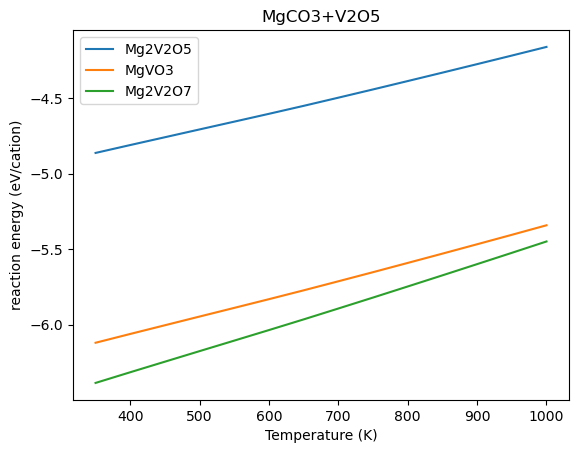

In [27]:
plt.plot(temp, Mg2V2O5_Only_TempDep, label="Mg2V2O5")
plt.plot(temp, MgVO3_Only_TempDep, label="MgVO3")
plt.plot(temp, Mg2V2O7_Only_TempDep, label="Mg2V2O7")


plt.legend()
plt.xlabel("Temperature (K)")
plt.ylabel("reaction energy (eV/cation)")
plt.title("MgCO3+V2O5")

plt.savefig("Mg-V-O_PhaseOnly_TempDep.png")
plt.show()

In [ ]:
################## Hydrogen H2 Stuff ##############################################################################

In [11]:
temp = 700  # units: C (Kelvin really, but add 273 on next line)

T=273+temp
R= 8.63*(10**-5)

chem_pot_TF_hydrogen = np.log(0.02)*(R*T)

gibbs_entries = GibbsEntrySet.from_computed_entries(entries, 273+temp)
filtered_entries = gibbs_entries.filter_by_stability(1.0)

In [13]:
def get_most_stable_entry(formula):
    relevant_entries = [entry for entry in filtered_entries if entry.composition.reduced_formula == Composition(formula).reduced_formula]
    relevant_entries = sorted(relevant_entries, key=lambda e: e.energy_per_atom)
    return relevant_entries[0]

#precursors
MgCO3= get_most_stable_entry("MgCO3")
CO2 = get_most_stable_entry("CO2")
O2 = get_most_stable_entry("O2")
H2O = get_most_stable_entry("H2O")
H2 = get_most_stable_entry("H2")
V2O3 = get_most_stable_entry("V2O3")
V2O5 = get_most_stable_entry("V2O5")
MgVO2= get_most_stable_entry("MgVO2")
MgVO3= get_most_stable_entry("MgVO3")
Mg2V2O7= get_most_stable_entry("Mg2V2O7")
Mg2V2O5= get_most_stable_entry("Mg2V2O5")

In [14]:
Mg2V2O5= get_most_stable_entry("Mg2V2O5")
MgVO3= get_most_stable_entry("MgVO3")
Mg2V2O7= get_most_stable_entry("Mg2V2O7")

H_chem_pot = np.linspace(-10, 10, 21)
MgVO2_H2array=np.zeros(len(H_chem_pot))
MgVO3_H2array=np.zeros(len(H_chem_pot))
Mg2V2O5_H2array=np.zeros(len(H_chem_pot))
Mg2V2O7_H2array=np.zeros(len(H_chem_pot))
             
#NaVO5_array=np.zeros(len(o_chem_pot))
for i in range(len(H_chem_pot)):
    MgVO2_H2array[i] = (OpenComputedReaction.balance([Mg2V2O7, H2], [MgVO2, H2O, O2], chempots={Element("H"): H_chem_pot[i], Element("O"): chem_pot_TF_argonne})).energy_per_atom
    MgVO3_H2array[i] = (OpenComputedReaction.balance([Mg2V2O7, H2], [MgVO3, H2O, O2], chempots={Element("H"): H_chem_pot[i], Element("O"): chem_pot_TF_argonne})).energy_per_atom
    Mg2V2O5_H2array[i] = (OpenComputedReaction.balance([Mg2V2O7, H2], [Mg2V2O5, H2O, O2], chempots={Element("H"): H_chem_pot[i], Element("O"): chem_pot_TF_argonne})).energy_per_atom
    Mg2V2O7_H2array[i] = (OpenComputedReaction.balance([Mg2V2O7], [Mg2V2O7], chempots={Element("H"): H_chem_pot[i], Element("O"): chem_pot_TF_argonne})).energy_per_atom

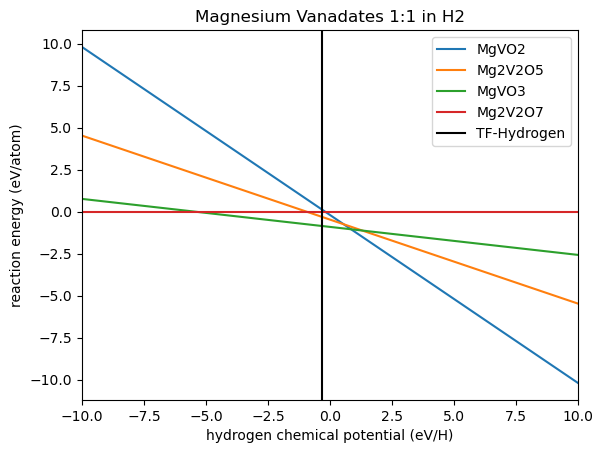

In [15]:
plt.plot(H_chem_pot, MgVO2_H2array, label="MgVO2")
plt.plot(H_chem_pot, Mg2V2O5_H2array, label="Mg2V2O5")
plt.plot(H_chem_pot, MgVO3_H2array, label="MgVO3")
plt.plot(H_chem_pot, Mg2V2O7_H2array, label="Mg2V2O7")

#plt.plot(chem_pot_TF_hydrogen, MgVO3_H2array[10], label="Experimental: MgVO3", **{'color': 'purple', 'marker': 'o'})

plt.axvline(x = chem_pot_TF_hydrogen, color = 'black', label = 'TF-Hydrogen')

plt.legend()
plt.xlabel("hydrogen chemical potential (eV/H)")
plt.ylabel("reaction energy (eV/atom)")
plt.title("Magnesium Vanadates 1:1 in H2")
plt.xlim(-10,10)
plt.savefig("Mg2V2O7_Reduction_H2.png")
plt.show()

In [16]:
def get_most_stable_entry(formula):
    relevant_entries = [entry for entry in filtered_entries if entry.composition.reduced_formula == Composition(formula).reduced_formula]
    relevant_entries = sorted(relevant_entries, key=lambda e: e.energy_per_atom)
    return relevant_entries[0]

temp = np.linspace(350, 1000, 14)

MgVO2_TempDep_H2=np.zeros(len(temp))
Mg2V2O5_TempDep_H2=np.zeros(len(temp))
MgVO3_TempDep_H2=np.zeros(len(temp))
Mg2V2O7_TempDep_H2=np.zeros(len(temp))

for i in range(0, len(temp)):

    chem_pot_TF_hydrogen = np.log(0.02)*(R*temp[i])
    chem_pot_TF_argonne = np.log(10**-22)*(R*temp[i])

    gibbs_entries = GibbsEntrySet.from_computed_entries(entries, int(temp[i]))
    filtered_entries = gibbs_entries.filter_by_stability(1.0)

    #precursors
    MgCO3= get_most_stable_entry("MgCO3")
    CO2 = get_most_stable_entry("CO2")
    O2 = get_most_stable_entry("O2")
    H2 = get_most_stable_entry("H2")
    H2O = get_most_stable_entry("H2O")
    V2O3 = get_most_stable_entry("V2O3")
    V2O5 = get_most_stable_entry("V2O5")
    MgVO2= get_most_stable_entry("MgVO2")
    Mg2V2O5= get_most_stable_entry("Mg2V2O5")
    MgVO3= get_most_stable_entry("MgVO3")
    Mg2V2O7= get_most_stable_entry("Mg2V2O7")

    #Argon = -5.059235

    MgVO2_TempDep_H2[i] = (OpenComputedReaction.balance([Mg2V2O7, H2], [MgVO2, H2O, O2], chempots={Element("O"): chem_pot_TF_argonne, Element("H"): chem_pot_TF_hydrogen})).energy_per_atom
    Mg2V2O5_TempDep_H2[i] = (OpenComputedReaction.balance([Mg2V2O7, H2], [Mg2V2O5, H2O, O2], chempots={Element("O"): chem_pot_TF_argonne, Element("H"): chem_pot_TF_hydrogen})).energy_per_atom
    MgVO3_TempDep_H2[i] = (OpenComputedReaction.balance([Mg2V2O7, H2], [MgVO3, H2O, O2], chempots={Element("O"): chem_pot_TF_argonne, Element("H"): chem_pot_TF_hydrogen})).energy_per_atom
    Mg2V2O7_TempDep_H2[i] = (OpenComputedReaction.balance([Mg2V2O7], [Mg2V2O7], chempots={Element("O"): chem_pot_TF_argonne, Element("H"): chem_pot_TF_hydrogen})).energy_per_atom

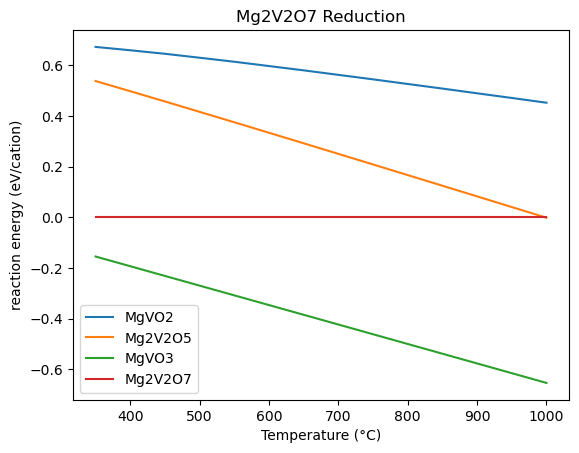

In [17]:
plt.plot(temp, MgVO2_TempDep_H2, label="MgVO2")
plt.plot(temp, Mg2V2O5_TempDep_H2, label="Mg2V2O5")
plt.plot(temp, MgVO3_TempDep_H2, label="MgVO3")
plt.plot(temp, Mg2V2O7_TempDep_H2, label="Mg2V2O7")

#plt.plot(temp[9], CaVO3_TempDep_H2[9], label="Experimental: CaVO3", **{'color': 'purple', 'marker': 'o', 'markersize': 15})
#plt.plot(temp[7], CaVO3_TempDep_H2[7], **{'color': 'purple', 'marker': 'o', 'markersize': 15})


plt.legend()
plt.xlabel("Temperature (°C)")
plt.ylabel("reaction energy (eV/cation)")
plt.title("Mg2V2O7 Reduction")

plt.savefig("Mg2V2O7_Reduction_TempDep_H2.png")
plt.show()